In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
# point to the data, these three files should be in the same directory as the ipynb
data = pd.read_csv('EDA_FTIR_Neat_CyH.csv')
syn = pd.read_csv('EDA_syn_scale.csv')
anti = pd.read_csv('EDA_anti_scale.csv')

In [3]:
# first lets plot the data using plotly, which is offers fantastic interactivity.
import plotly.graph_objects as go

xscale = 1
yscale = 0.0015


fig = go.Figure()

# Adding the line plot for 'Ethyldiazoacetate'
fig.add_trace(go.Scatter(
    x=data['wavenumber'],
    y=data['intensity'],
    mode='lines',
    name='experiment',
))

# Adding the line plot for 'syn-DFT'
fig.add_trace(go.Scatter(
    x=syn['wavenumber'] * xscale,
    y=syn['intensity'] * yscale,
    mode='lines',
    name='syn-DFT',
))

# Adding the line plot for 'anti-DFT'
fig.add_trace(go.Scatter(
    x=anti['wavenumber'] * xscale,
    y=anti['intensity'] * yscale,
    mode='lines',
    name='anti-DFT',
))

# Updating the layout
fig.update_layout(
    title='IR spectrum of ethyl diazoacetate in cyclohexane',
    xaxis_title='wavenumber',
    yaxis_title='intensity',
    xaxis_range=[2200, 1100],
    yaxis_range=[-0.1, 1.1],
)

fig.show()


In [14]:
# my color preferences
# superficial stuff, but some of the code calls on these color defs
excel = "#0B9A6D"
blue = "#004583"
k65 = "#595959"
k40 = "#999999"
k20 = "#CCCCCC"
k10 = "#E6E6E6"
k3 = "#F7F7F7"
k80 = "#333333"
teal_light = "#49B0AB"
teal_dark = "#1C7B81"
spartan = "#18453B"
yellow = "#E6BF5C"
orange = "#D86545"
red = "#D86545"
purple = "#3D2244"
def_color = k80

colors = [k80, excel, blue, k40, teal_dark]

In [15]:
# superficial stuff, you can skip this cell
# change some of the matplotlib defaults
from matplotlib import rcParams
def_color = k80
rcParams['text.color'] = def_color
rcParams['axes.edgecolor'] = def_color
rcParams['axes.labelcolor'] = def_color
rcParams['axes.facecolor'] = 'white'
rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
rcParams['patch.edgecolor'] = def_color
rcParams['scatter.edgecolors'] = def_color
rcParams['grid.color'] = def_color
rcParams['lines.color'] = def_color
rcParams['figure.facecolor'] = 'white'
rcParams['figure.edgecolor'] = 'white'
rcParams['savefig.facecolor'] = 'white'
rcParams['savefig.edgecolor'] = 'white'
rcParams['xtick.color'] = def_color
rcParams['ytick.color'] = def_color
rcParams['axes.labelcolor'] = def_color
rcParams['font.size'] = 12

In [16]:
# superficial stuff, you can skip this cell.
# if you want to use a specific font, you will need to where it is located in `font_dir`
from matplotlib import rcParams
import matplotlib.font_manager as font_manager

# Add every font at the specified location
font_dir = ['/Users/gairj/Library/Fonts/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams['font.family'] = 'Montserrat'


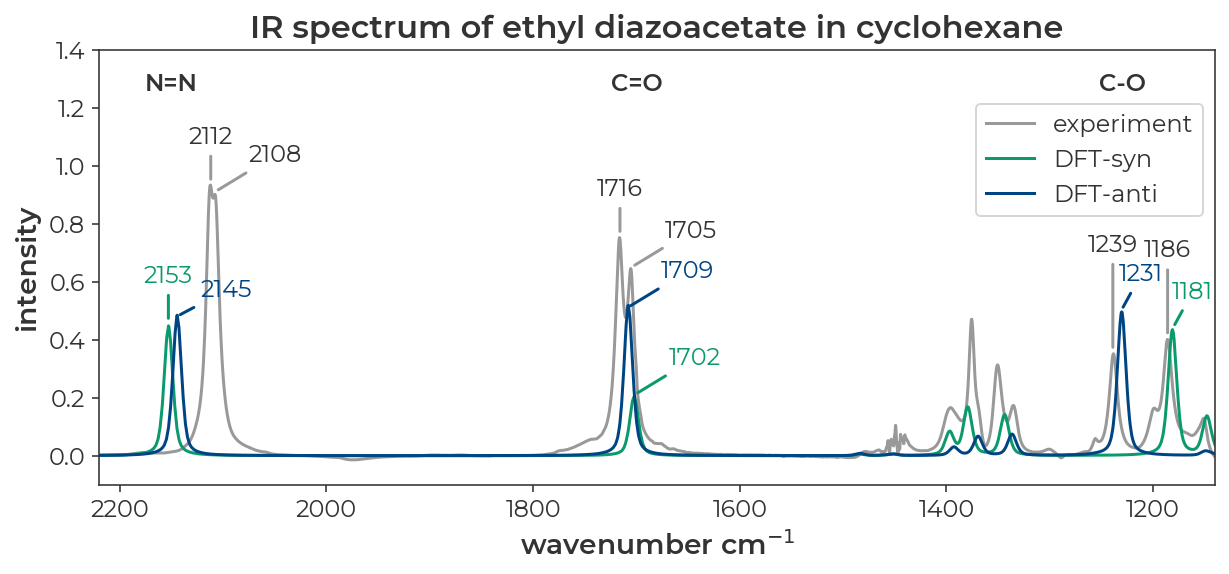

In [17]:
# use the plotly plot to estimate the points to annotate
yscale = .0015
lw = 1.5
fs = 12 # annotation font size

fig, ax = plt.subplots(figsize=(10,4))

# plot experimental data
ax.plot(data['wavenumber'], data['intensity'], label='experiment',color=k40, lw=lw)
points = [(2112, 0.94, 0, 20), (2108, 0.91, 30,15), (1716, 0.76,0, 20), (1705, 0.65, 30, 15), (1239, 0.36, 0, 50), (1186, 0.41, 0, 40),]
for x_value, y_value, x_offset, y_offset in points:
    ax.annotate(f'{x_value}', xy=(x_value, y_value), xytext=(x_offset, y_offset),
                textcoords='offset points',
                arrowprops=dict(arrowstyle='-', color=k40, lw=1.5),
                fontsize=fs, color=k80, ha='center')

# plot DFT syn
ax.plot(syn['wavenumber'], syn['intensity']*yscale, label='DFT-syn', color=excel, lw=lw,)
points = [(2153, 0.46, 0, 20), (1702, 0.21, 30,15), (1181, 0.44,10, 15),]
for x_value, y_value, x_offset, y_offset in points:
    ax.annotate(f'{x_value}', xy=(x_value, y_value), xytext=(x_offset, y_offset),
                textcoords='offset points',
                arrowprops=dict(arrowstyle='-', color=excel, lw=1.5),
                fontsize=fs, color=excel, ha='center')
        
# plot DFT anti
ax.plot(anti['wavenumber'], anti['intensity']*yscale, label='DFT-anti', color=blue, lw=lw,)
points = [(2145, 0.48, 25, 10), (1709, 0.51, 30,15), (1231, 0.5,10,15),]
for x_value, y_value, x_offset, y_offset in points:
    ax.annotate(f'{x_value}', xy=(x_value, y_value), xytext=(x_offset, y_offset),
                textcoords='offset points',
                arrowprops=dict(arrowstyle='-', color=blue, lw=1.5),
                fontsize=fs, color=blue, ha='center')

# choose what portion of the x-axis to view
ax.set_ylim(-0.1, (ymax := 1.4)); ax.set_xlim(2220, 1140)    # plot all three peaks of interest
# ax.set_ylim(-0.1, (ymax := 1.3)); ax.set_xlim(2300, 1950)    # just N=N
# ax.set_ylim(-0.1, (ymax := 1.1)); ax.set_xlim(1900, 1500)  # just C=O
# ax.set_ylim(-0.1, (ymax := 0.9)); ax.set_xlim(1320, 1130)  # just C-O

# annotate the three regions
ax.annotate('N=N', xy=(2150, 0.9*ymax),fontsize=12, fontweight='semibold', ha='center')
ax.annotate('C=O', xy=(1700, 0.9*ymax),fontsize=12, fontweight='semibold', ha='center')
ax.annotate('C-O', xy=(1230, 0.9*ymax),fontsize=12, fontweight='semibold', ha='center')


ax.set_xlabel('wavenumber cm$^{-1}$', fontweight='semibold', fontsize=14)
ax.set_ylabel('intensity', fontweight='semibold', fontsize=14)
if ymax == 1.4: ax.set_title('IR spectrum of ethyl diazoacetate in cyclohexane', fontsize=16,fontweight='semibold')
ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.59))
plt.show()

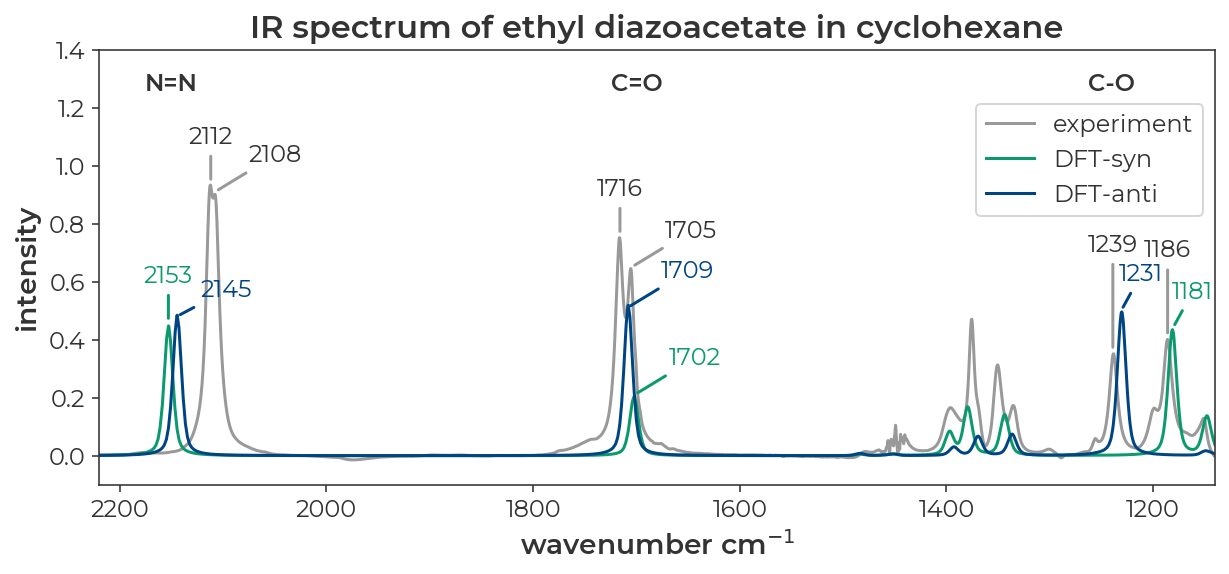

In [30]:
# do the same thing with seaborn
import seaborn as sns
yscale = 0.0015
lw = 1.5

fig, ax = plt.subplots(figsize=(10, 4))

fs = 12  # annotation font size

# Experiment
sns.lineplot(data=data, x='wavenumber', y='intensity', label='experiment', ax=ax, lw=lw, color=k40)

points = [(2112, 0.94, 0, 20), (2108, 0.91, 30, 15), (1716, 0.76, 0, 20), (1705, 0.65, 30, 15), (1239, 0.36, 0, 50), (1186, 0.41, 0, 40)]
for x_value, y_value, x_offset, y_offset in points:
    ax.annotate(f'{x_value}', xy=(x_value, y_value), xytext=(x_offset, y_offset),
                textcoords='offset points',
                arrowprops=dict(arrowstyle='-', color=k40, lw=1.5),
                fontsize=fs, color=k80, ha='center')

# DFT-syn
sns.lineplot(data=syn, x='wavenumber', y=syn['intensity'] * yscale, label='DFT-syn', ax=ax, lw=lw, color=excel)

points = [(2153, 0.46, 0, 20), (1702, 0.21, 30, 15), (1181, 0.44, 10, 15)]
for x_value, y_value, x_offset, y_offset in points:
    ax.annotate(f'{x_value}', xy=(x_value, y_value), xytext=(x_offset, y_offset),
                textcoords='offset points',
                arrowprops=dict(arrowstyle='-', color=excel, lw=1.5),
                fontsize=fs, color=excel, ha='center')

# DFT-anti
sns.lineplot(data=anti, x='wavenumber', y=anti['intensity'] * yscale, label='DFT-anti', ax=ax, lw=lw, color=blue)

points = [(2145, 0.48, 25, 10), (1709, 0.51, 30, 15), (1231, 0.5, 10, 15)]
for x_value, y_value, x_offset, y_offset in points:
    ax.annotate(f'{x_value}', xy=(x_value, y_value), xytext=(x_offset, y_offset),
                textcoords='offset points',
                arrowprops=dict(arrowstyle='-', color=blue, lw=1.5),
                fontsize=fs, color=blue, ha='center')

# Choose what portion of the x-axis to view
ax.set_ylim(-0.1, ymax := 1.4)
ax.set_xlim(2220, 1140)  # plot all three peaks of interest
# ax.set_ylim(-0.1, ymax := 1.3)
# ax.set_xlim(2300, 1950)  # just N=N
# ax.set_ylim(-0.1, ymax := 1.1)
# ax.set_xlim(1900, 1500)  # just C=O
# ax.set_ylim(-0.1, ymax := 0.9)
# ax.set_xlim(1320, 1130)  # just C-O

# Annotate the three regions
ax.annotate('N=N', xy=(2150, 0.9 * ymax), fontsize=12, fontweight='semibold', ha='center')
ax.annotate('C=O', xy=(1700, 0.9 * ymax), fontsize=12, fontweight='semibold', ha='center')
ax.annotate('C-O', xy=(1240, 0.9 * ymax), fontsize=12, fontweight='semibold', ha='center')

ax.set_xlabel('wavenumber cm$^{-1}$', fontweight='semibold', fontsize=14)
ax.set_ylabel('intensity', fontweight='semibold', fontsize=14)

if ymax == 1.4:
    ax.set_title('IR spectrum of ethyl diazoacetate in cyclohexane', fontsize=16, fontweight='semibold')

ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.59))
plt.show()

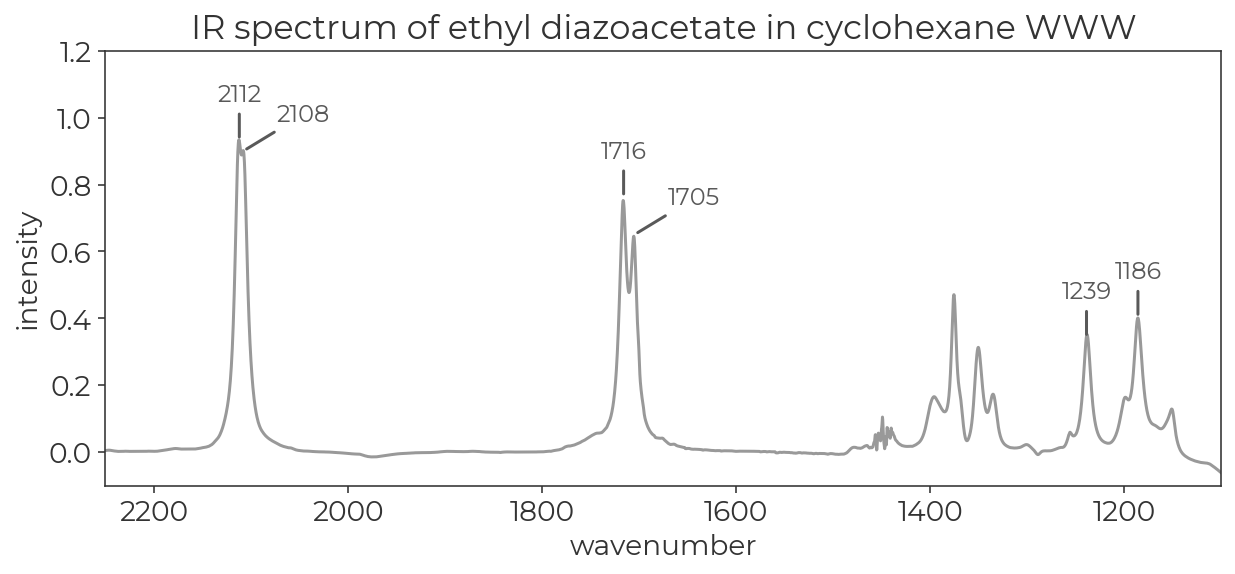

In [42]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(data['wavenumber'], data['intensity'], label='experiment', color=k40, lw=1.5)
ax.set_xlim(2250, 1100)
ax.set_ylim(-0.1, 1.2)
ax.set_xlabel("wavenumber")
ax.set_ylabel('intensity')
ax.set_title('IR spectrum of ethyl diazoacetate in cyclohexane WWW')

# List of (x_value, y_value, y_offset) tuples
points = [(2112, 0.93, 0, 20), (2108, 0.90, 30,15), (1716, 0.76,0, 20), (1705, 0.65, 30, 15), (1239, 0.34, 0, 20), (1186, 0.4, 0, 20),]

# Add annotations for each point
for x_value, y_value, x_offset, y_offset in points:
    ax.annotate(f'{x_value}', xy=(x_value, y_value), xytext=(x_offset, y_offset),
                textcoords='offset points',
                arrowprops=dict(arrowstyle='-', color=k65, lw=1.5),
                fontsize=12, color=k65, ha='center')

plt.show()


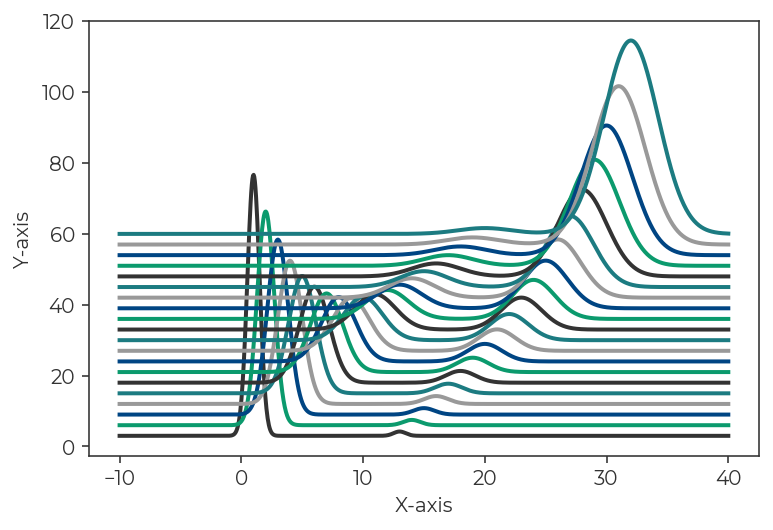

In [13]:
x = np.linspace(-10, 40, 1000)
fig, ax = plt.subplots()

for i in range(20):
    i = i + 1
    mu = i
    sigma = i*.5
    y = 90*np.exp(-(x - mu)**2 / (2 * sigma**2/i))*np.exp(-i/5) + np.exp(-(x - mu -12)**2 / (2 * sigma**2/i))*np.exp(i/5)
    ax.plot(x, y + 3*i, label=f'Curve {i+1}', alpha=1, lw=2)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# ax.set_ylim(-1, 100), ax.set_xlim(-10,40)
plt.show()